In [39]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.chunk.regexp import *

In [40]:
def tokenizar (_frase, _lower):
    if _lower:
        return word_tokenize(_frase.lower())
    else:
        return word_tokenize(_frase)
    
def make_alpha(_tokens):
    return [word for word in _tokens if word.isalpha()]

In [41]:
frase = "I want a dress for a wedding"
tokens = make_alpha(tokenizar(frase, True))
tokens

['i', 'want', 'a', 'dress', 'for', 'a', 'wedding']

In [42]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Cristian
[nltk_data]     Mendieta\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [43]:
nltk.pos_tag(tokens)

[('i', 'NN'),
 ('want', 'VBP'),
 ('a', 'DT'),
 ('dress', 'NN'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('wedding', 'NN')]

In [44]:
from nltk.corpus import treebank

In [45]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to C:\Users\Cristian
[nltk_data]     Mendieta\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [46]:
pip install svgling

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


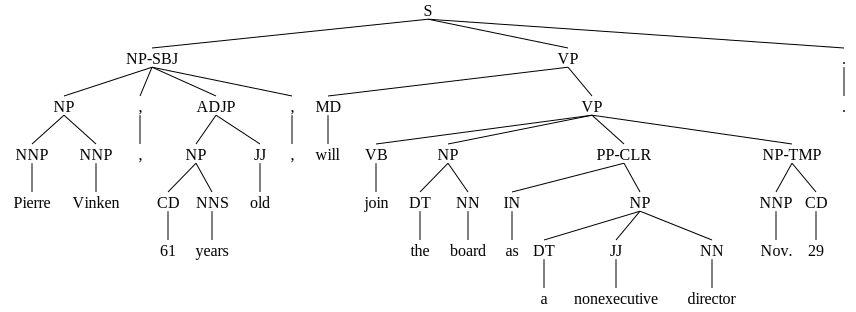

In [47]:
tree = treebank.parsed_sents('wsj_0001.mrg')[0]
tree

In [48]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Cristian
[nltk_data]     Mendieta\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [49]:
nltk.download('words')

[nltk_data] Downloading package words to C:\Users\Cristian
[nltk_data]     Mendieta\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

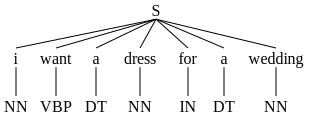

In [50]:
tree = nltk.chunk.ne_chunk(nltk.pos_tag(tokens))
tree

In [51]:
grammar = nltk.CFG.fromstring("""
    S -> NP VP
    PP -> P NP
    NP -> Det N | Det N PP | 'i'
    VP -> V NP | VP PP
    Det -> 'a'
    N -> 'dress' | 'wedding'
    V -> 'want'
    P -> 'for'
""")

parser = nltk.ChartParser(grammar, trace=1)

def parsear(_tokens):
    return parser.parse(_tokens)

In [52]:
for tree in parsear(tokens):
    print(tree, "\n")
    tree.pretty_print()

|.  i  . want.  a  .dress. for .  a  .weddi.|
|[-----]     .     .     .     .     .     .| [0:1] 'i'
|.     [-----]     .     .     .     .     .| [1:2] 'want'
|.     .     [-----]     .     .     .     .| [2:3] 'a'
|.     .     .     [-----]     .     .     .| [3:4] 'dress'
|.     .     .     .     [-----]     .     .| [4:5] 'for'
|.     .     .     .     .     [-----]     .| [5:6] 'a'
|.     .     .     .     .     .     [-----]| [6:7] 'wedding'
|[-----]     .     .     .     .     .     .| [0:1] NP -> 'i' *
|[----->     .     .     .     .     .     .| [0:1] S  -> NP * VP
|.     [-----]     .     .     .     .     .| [1:2] V  -> 'want' *
|.     [----->     .     .     .     .     .| [1:2] VP -> V * NP
|.     .     [-----]     .     .     .     .| [2:3] Det -> 'a' *
|.     .     [----->     .     .     .     .| [2:3] NP -> Det * N
|.     .     [----->     .     .     .     .| [2:3] NP -> Det * N PP
|.     .     .     [-----]     .     .     .| [3:4] N  -> 'dress' *
|.     .     [---

In [53]:
from nltk import UnigramTagger, BigramTagger, TrigramTagger

In [54]:
from nltk.corpus import cess_esp

In [55]:
nltk.download('cess_esp')

[nltk_data] Downloading package cess_esp to C:\Users\Cristian
[nltk_data]     Mendieta\AppData\Roaming\nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


True

In [56]:
tagged_sents = cess_esp.tagged_sents()

In [57]:
len(tagged_sents)

6030

In [67]:
uni = UnigramTagger(tagged_sents)
big = BigramTagger(tagged_sents, backoff=uni)
trig = TrigramTagger(tagged_sents, backoff=big)

In [59]:
tokens_test = tokenizar("El perro come croquetas", True)

print('Unigram: ', uni.tag(tokens_test))
print('Bigram: ', big.tag(tokens_test))
print('Trigram: ', trig.tag(tokens_test))

Unigram:  [('el', 'da0ms0'), ('perro', 'ncms000'), ('come', 'vmip3s0'), ('croquetas', None)]
Bigram:  [('el', 'da0ms0'), ('perro', 'ncms000'), ('come', 'vmip3s0'), ('croquetas', None)]
Trigram:  [('el', 'da0ms0'), ('perro', 'ncms000'), ('come', 'vmip3s0'), ('croquetas', None)]


In [60]:
train = [
    ('el', 'da0ms0'), 
    ('perro', 'ncms000'), 
    ('come', 'vmip3s0'), 
    ('croquetas', 'ncfp000')
]

tagged_sents = list(tagged_sents)
tagged_sents.append(train)

In [61]:
tokens_test = tokenizar("Me ha llegado la factura de la luz", True)

print('Unigram: ', uni.tag(tokens_test))
print('Bigram: ', big.tag(tokens_test))
print('Trigram: ', trig.tag(tokens_test))

Unigram:  [('me', 'pp1cs000'), ('ha', 'vaip3s0'), ('llegado', 'vmp00sm'), ('la', 'da0fs0'), ('factura', None), ('de', 'sps00'), ('la', 'da0fs0'), ('luz', 'ncfs000')]
Bigram:  [('me', 'pp1cs000'), ('ha', 'vaip3s0'), ('llegado', 'vmp00sm'), ('la', 'da0fs0'), ('factura', None), ('de', 'sps00'), ('la', 'da0fs0'), ('luz', 'ncfs000')]
Trigram:  [('me', 'pp1cs000'), ('ha', 'vaip3s0'), ('llegado', 'vmp00sm'), ('la', 'da0fs0'), ('factura', None), ('de', 'sps00'), ('la', 'da0fs0'), ('luz', 'ncfs000')]


In [62]:
train2 = [
    ('me', 'pp1cs000'), 
    ('ha', 'vaip3s0'), 
    ('llegado', 'vmp00sm'), 
    ('la', 'da0fs0'), 
    ('factura', 'ncfs000'), 
    ('de', 'sps00'), 
    ('la', 'da0fs0'), 
    ('luz', 'ncfs000')
]

In [63]:
tagged_sents = list(tagged_sents)
tagged_sents.append(train2)

In [68]:
tokens_test = tokenizar("La factura de la luz ha caducado", True)

print('Unigram: ', uni.tag(tokens_test))
print('Bigram: ', big.tag(tokens_test))
print('Trigram: ', trig.tag(tokens_test))

Unigram:  [('la', 'da0fs0'), ('factura', 'ncfs000'), ('de', 'sps00'), ('la', 'da0fs0'), ('luz', 'ncfs000'), ('ha', 'vaip3s0'), ('caducado', 'vmp00sm')]
Bigram:  [('la', 'da0fs0'), ('factura', 'ncfs000'), ('de', 'sps00'), ('la', 'da0fs0'), ('luz', 'ncfs000'), ('ha', 'vaip3s0'), ('caducado', 'vmp00sm')]
Trigram:  [('la', 'da0fs0'), ('factura', 'ncfs000'), ('de', 'sps00'), ('la', 'da0fs0'), ('luz', 'ncfs000'), ('ha', 'vaip3s0'), ('caducado', 'vmp00sm')]


In [65]:
train3 = [
    ('la', 'da0fs0'), 
    ('factura', 'ncfs000'), 
    ('de', 'sps00'), 
    ('la', 'da0fs0'), 
    ('luz', 'ncfs000'), 
    ('ha', 'vaip3s0'), 
    ('caducado', 'vmp00sm')
]

In [66]:
tagged_sents = list(tagged_sents)
tagged_sents.append(train3)